<a href="https://colab.research.google.com/github/mateusopaiva/analysis-obesity-and-GDP-per-person/blob/main/analysis_of_obesity_and_GDP_per_person.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto final

Bem vindo ao projeto final do curso/módulo de Pandas.
Neste projeto, você deve responder a um conjunto de perguntas feitas a dois conjuntos de dados:

1. [Obesity among adults by country, 1975-2016](https://www.kaggle.com/amanarora/obesity-among-adults-by-country-19752016/)
2. [GDP Per Person (1901-2011)](https://www.kaggle.com/divyansh22/gdp-per-person-19012011?select=GDP.csv)

Tais conjuntos de dados são públicos foram publicados no Kaggle. Mais instruções sobre cada um deles podem ser encontrados nos links acima. Você também os encontrará na pasta `Datasets`, dentro de nossas apostilas.

In [1]:
import pandas as pd
import numpy as np

## Perguntas - Obesity among adults by country, 1975-2016

In [2]:
df_obesity = pd.read_csv("Datasets/obesity_cleaned.csv")

In [3]:
df_obesity.head()

,Unnamed: 0,Country,Year,Obesity (%),Sex
0,0,Afghanistan,1975,0.5 [0.2-1.1],Both sexes
1,1,Afghanistan,1975,0.2 [0.0-0.6],Male
2,2,Afghanistan,1975,0.8 [0.2-2.0],Female
3,3,Afghanistan,1976,0.5 [0.2-1.1],Both sexes
4,4,Afghanistan,1976,0.2 [0.0-0.7],Male


- Limpe os dados do DataFrame, criando uma coluna de nome 'Obesity' que conterá os valores de obesidade. Transforme em float as colunas que porventura foram importadas como string.

In [4]:
del df_obesity["Unnamed: 0"]
df_obesity["Obesity"] = df_obesity["Obesity (%)"].apply(lambda x: x.split(" ")[0])

df_obesity.loc[df_obesity["Obesity"] == "No", "Obesity"] = np.nan
df_obesity.dropna(inplace=True)

In [5]:
df_obesity["Obesity"] = df_obesity["Obesity"].apply(lambda x: float(x))
# df_obesity["Obesity"] = df_obesity["Obesity"].astype(float)

df_obesity["Year"] = df_obesity["Year"].apply(lambda x: int(x))
df_obesity.set_index("Year", inplace=True)

In [6]:
df_obesity.head()

,Country,Obesity (%),Sex,Obesity
Year,,,,
1975,Afghanistan,0.5 [0.2-1.1],Both sexes,0.5
1975,Afghanistan,0.2 [0.0-0.6],Male,0.2
1975,Afghanistan,0.8 [0.2-2.0],Female,0.8
1976,Afghanistan,0.5 [0.2-1.1],Both sexes,0.5
1976,Afghanistan,0.2 [0.0-0.7],Male,0.2


- Qual o percentual médio de obesidade por sexo no mundo no ano de 2015?

In [7]:
df_obesity[df_obesity.index == 2015].groupby('Sex').mean(numeric_only=True)

,Obesity
Sex,
Both sexes,19.508377
Female,22.899476
Male,15.980628


- Quais são os 5 países com a maior e a menor taxa de aumento nos índices de obesidade no período observado?

In [8]:
df_obesity_start = df_obesity[df_obesity.index == 1975]
df_obesity_end = df_obesity[df_obesity.index == 2016]

df_obesity_start.set_index("Country", inplace=True)
df_obesity_end.set_index("Country", inplace=True)

In [9]:
df_obesity_ev = df_obesity_end[df_obesity_end["Sex"] == "Both sexes"]["Obesity"] - df_obesity_start[df_obesity_start["Sex"] == "Both sexes"]["Obesity"]

In [10]:
df_obesity_ev.sort_values().dropna().head()

Country
Viet Nam       2.0
Singapore      3.1
Japan          3.3
Bangladesh     3.4
Timor-Leste    3.6
Name: Obesity, dtype: float64

In [11]:
df_obesity_ev.sort_values().dropna().tail()

Country
Cook Islands    27.9
Tonga           28.3
Kiribati        30.1
Niue            31.1
Tuvalu          33.7
Name: Obesity, dtype: float64

- Quais os países com maiores e menores níveis percetuais de obesidade em 2015?

In [12]:
df_2015 = df_obesity[df_obesity.index == 2015].copy()
df_2015[df_2015["Obesity"] == df_2015["Obesity"].max()]

,Country,Obesity (%),Sex,Obesity
Year,,,,
2015,Nauru,63.1 [55.5-70.3],Female,63.1


In [13]:
df_2015 = df_obesity[df_obesity.index == 2015].copy()
df_2015[df_2015["Obesity"] == df_2015["Obesity"].min()]

,Country,Obesity (%),Sex,Obesity
Year,,,,
2015,Viet Nam,1.5 [0.8-2.5],Male,1.5


- Qual a diferença média percentual de obesidade entre sexos ao longo dos anos para o Brasil?

In [14]:
df_brasil = df_obesity[df_obesity["Country"] == "Brazil"]

<Axes: xlabel='Year'>

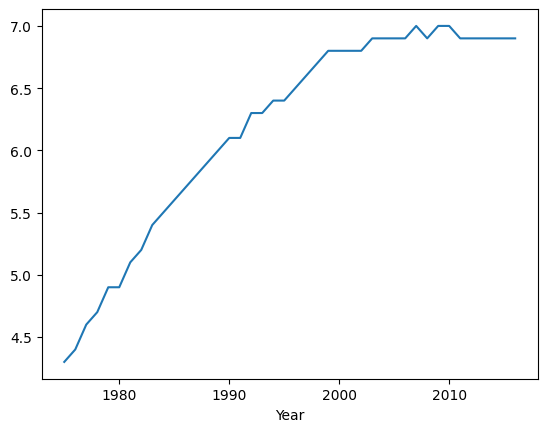

In [15]:
(df_brasil[df_brasil["Sex"] == "Female"]["Obesity"] - df_brasil[df_brasil["Sex"] == "Male"]["Obesity"]).plot()

- Você conseguiria plotar um gráfico mostrando a evolução da obesidade para ambos sexos no mundo?

In [16]:
all_countries = df_obesity["Country"].value_counts()
df_both = df_obesity[df_obesity["Sex"] == "Both sexes"]
df_both = df_both.groupby("Year")["Obesity"].mean()

<Axes: xlabel='Year'>

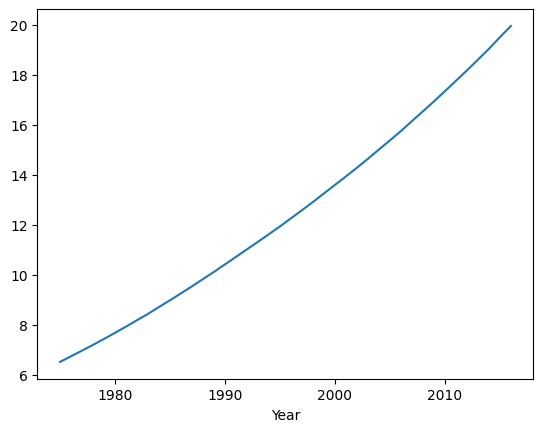

In [17]:
df_both.plot()

## Perguntas - GDP Per Person (1901-2011)

In [18]:
df_gdp = pd.read_csv("Datasets/gdp.csv", decimal=".")
df_gdp.head()

,Country,Region,Year,GDP_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1921,662.40


In [19]:
df_gdp.columns

Index(['Country', 'Region', 'Year', ' GDP_pp '], dtype='object')

- Limpe o conjunto de dados, convertendo strings em datas ou float, quando necessário.

In [20]:
df_gdp["Year"] = df_gdp["Year"].apply(lambda x: int(x.split("/")[-1]))

In [21]:
df_gdp["gdp_pp"] = df_gdp[" GDP_pp "].apply(lambda x: float(x.split(" ")[1].replace(",", "")))
del df_gdp[" GDP_pp "]

In [22]:
df_gdp.head(3)

,Country,Region,Year,gdp_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25


- Você conseguiria informar o primeiro valor registrado de cada país?

In [23]:
df_gdp.groupby("Country").min()["Year"]

Country
Afghanistan    1901
Albania        1901
Algeria        1901
Andorra        1901
Angola         1901
               ... 
Venezuela      1901
Vietnam        1901
Yemen, Rep.    1901
Zambia         1901
Zimbabwe       1901
Name: Year, Length: 193, dtype: int64

In [24]:
df_gdp.groupby("Country").min()["Year"].isna().sum()

0

In [25]:
df_gdp.groupby("Country").min()["Year"].value_counts()

Year
1901    192
1991      1
Name: count, dtype: int64

In [26]:
df_gdp.groupby("Country").min()["Year"][df_gdp.groupby("Country").min()["Year"] == 1991]

Country
Kosovo    1991
Name: Year, dtype: int64

- Informe as regiões com maiores crescimentos de PIB per capita no século passado.

In [27]:
df_gdp[df_gdp["Year"] < 2000]["Year"].max()

1996

In [28]:
df_gdp_start = df_gdp[(df_gdp["Year"] == 1901)]
df_gdp_end = df_gdp[(df_gdp["Year"] == 1996)]

In [29]:
((df_gdp_end.groupby("Region")["gdp_pp"].mean() / df_gdp_start.groupby("Region")["gdp_pp"].mean() - 1) * 100).sort_values(ascending=False)

Region
Middle East, North Africa, and Greater Arabia    857.215950
Asia                                             711.761516
Europe                                           594.046167
North America                                    589.760175
Central America and the Caribbean                406.426789
Australia and Oceania                            396.075383
South America                                    312.123735
Sub-Saharan Africa                               248.633780
Name: gdp_pp, dtype: float64

- Preecha os anos ausentes em cada país com uma estimativa, baseada na diferença entre o próximo registro e o anterior.

In [30]:
df_gdp.head()

,Country,Region,Year,gdp_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40


In [31]:
arr_years = np.arange(df_gdp["Year"].min(), df_gdp["Year"].max())
df_all_years = pd.DataFrame(arr_years, columns=["Year"])
df_all_years.index = df_all_years["Year"]

df_years_off = ~df_all_years["Year"].isin(df_gdp["Year"])
df_years_off = df_years_off[df_years_off].index

In [32]:
df_gdp = df_gdp.sort_values(["Country", "Year"])

df_gdp["delta_gdp"] = df_gdp["gdp_pp"] - df_gdp["gdp_pp"].shift(1)
df_gdp["delta_year"] = df_gdp["Year"] - df_gdp["Year"].shift(1)
df_gdp["gdp_year"] = (df_gdp["delta_gdp"] / df_gdp["delta_year"]).shift(-1)

In [33]:
df_gdp["next_year"] = df_gdp["Year"].shift(-1)
del df_gdp["delta_gdp"], df_gdp["delta_year"]

In [34]:
df_new_data = pd.DataFrame()

for idx, row in df_gdp.iterrows():
    if row["Year"] == 2011:
        continue

    year_to_add = df_years_off[(df_years_off < row["next_year"]) & (df_years_off >row["Year"])]

    for new_year in year_to_add:
        add_row = row.copy()
        add_row["gdp_pp"] = (new_year - add_row["Year"]) * add_row["gdp_year"] + add_row["gdp_pp"]
        add_row["Year"] = new_year
        df_new_data["kind"] = "estimated"
        df_new_data = pd.concat([df_new_data, add_row.to_frame().transpose()])

In [35]:
df_gdp.iloc[100:].head(10)

,Country,Region,Year,gdp_pp,gdp_year,next_year
100,Angola,Sub-Saharan Africa,1941,2170.80,119.530,1946.0
101,Angola,Sub-Saharan Africa,1946,2768.45,134.490,1951.0
102,Angola,Sub-Saharan Africa,1951,3440.90,21.628,1956.0
103,Angola,Sub-Saharan Africa,1956,3549.04,182.958,1961.0
104,Angola,Sub-Saharan Africa,1961,4463.83,168.862,1966.0
105,Angola,Sub-Saharan Africa,1966,5308.14,43.614,1971.0
106,Angola,Sub-Saharan Africa,1971,5526.21,-495.178,1976.0
107,Angola,Sub-Saharan Africa,1976,3050.32,-19.382,1981.0
108,Angola,Sub-Saharan Africa,1981,2953.41,-146.560,1986.0
109,Angola,Sub-Saharan Africa,1986,2220.61,102.048,1991.0


In [36]:
df_gdp = pd.concat([df_gdp, df_new_data]).sort_values(["Country", "Year"])
df_gdp["kind"].fillna("real", inplace=True)
df_gdp.index = df_gdp["Year"]

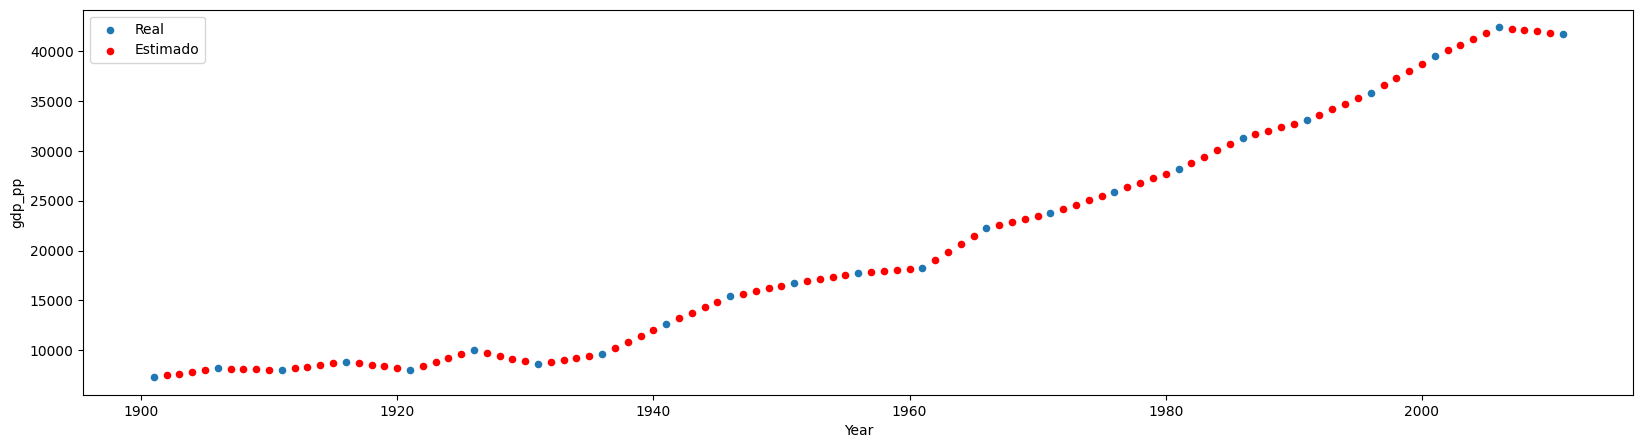

In [37]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 5))

df_gdp[(df_gdp["kind"] == "real") & (df_gdp["Country"] == "United States")].plot(kind="scatter", y="gdp_pp", x="Year", ax=ax,  label="Real")
df_gdp[(df_gdp["kind"] == "estimated") & (df_gdp["Country"] == "United States")].plot(kind="scatter", y="gdp_pp", x="Year", ax=ax, color="red",  label="Estimado")

ax.legend()
plt.show()

### DESAFIOS
- Você conseguiria criar um mapa do gdp ou da obesidade no mundo ao longo dos anos?

In [38]:
df_gdp[df_gdp["kind"] == "real"].reset_index(drop=True).head(5)

,Country,Region,Year,gdp_pp,gdp_year,next_year,kind
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,2.01,1906.0,real
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04,2.042,1911.0,real
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25,2.606,1916.0,real
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28,3.024,1921.0,real
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.4,3.094,1926.0,real


In [39]:
df_gdp["Year"] = df_gdp["Year"].astype(int)
df_gdp["gdp_pp"] = df_gdp["gdp_pp"].astype(float)

In [40]:
import plotly.express as px

df = px.data.gapminder()
dict_iso_alpha = df.set_index("country").to_dict()["iso_alpha"]
dict_num = {j: i for i, j in enumerate(df_gdp["Country"].unique())}

df_gdp["iso_alpha"] = df_gdp["Country"].map(dict_iso_alpha)
df_gdp["iso_num"] = df_gdp["Country"].map(dict_num)

fig = px.choropleth(df_gdp[df_gdp["kind"] == "real"].reset_index(drop=True), locations="iso_alpha", color="gdp_pp", hover_name="Country", animation_frame="Year")

fig.update_layout(height=600)
fig.show()

- Há uma relação entre níveis de obesidade e gdp per capita?

In [41]:
df_obesity["country-year"] = df_obesity["Country"] + "-" + df_obesity.reset_index()["Year"].apply(lambda x: str(int(x))).values
dict_obesity_year = df_obesity.set_index("country-year").to_dict()["Obesity"]

In [42]:
df_gdp["country-year"] = df_gdp["Country"] + "-" + df_gdp["Year"].apply(lambda x: str(x)).values
df_gdp["Obesity"] = df_gdp["country-year"].map(dict_obesity_year)

In [43]:
df_gdp_clean = df_gdp.dropna()

In [44]:
countries = df_gdp_clean["Country"].unique()

In [45]:
corr_list = []
for country in countries:
    corr_list += [df_gdp_clean[df_gdp_clean["Country"] == country][["Obesity", "gdp_pp"]].corr().iloc[0, 1]]

df_corr = pd.Series(corr_list, index=countries)

In [46]:
df_corr.mean()

0.5156020945367675

In [47]:
df_corr.std()

0.6523066623226487

<Axes: >

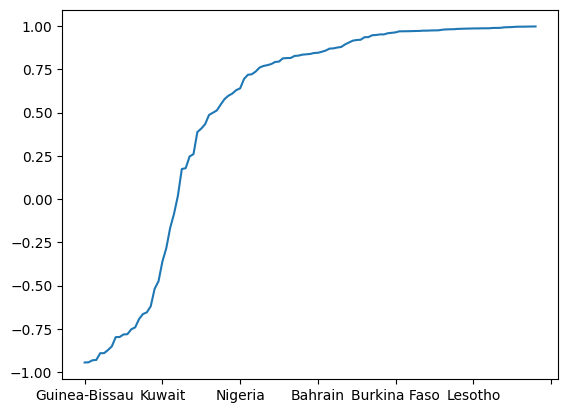

In [48]:
df_corr.sort_values().plot()

<Axes: xlabel='Year'>

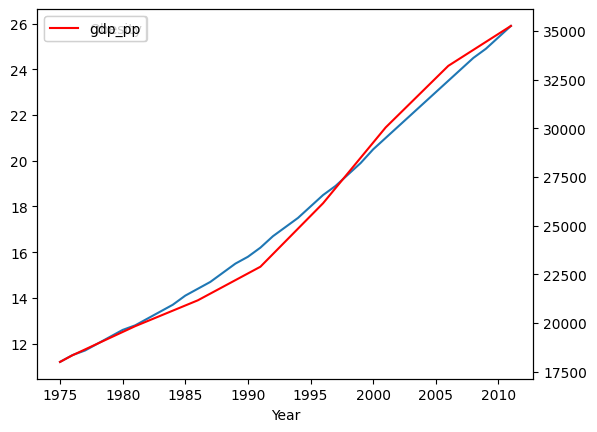

In [49]:
country = "Australia"
fig, ax = plt.subplots()
df_gdp_clean[df_gdp_clean["Country"] == country][["Obesity"]].plot(ax=ax)
ax2 = ax.twinx()
df_gdp_clean[df_gdp_clean["Country"] == country][["gdp_pp"]].plot(ax=ax2, color="red")

In [50]:
df_gdp_clean

,Country,Region,Year,gdp_pp,gdp_year,next_year,kind,iso_alpha,iso_num,country-year,Obesity
Year,,,,,,,,,,,
1975,Afghanistan,"Middle East, North Africa, and Greater Arabia",1975,847.692,18.498,1976.0,estimated,AFG,0,Afghanistan-1975,0.8
1976,Afghanistan,"Middle East, North Africa, and Greater Arabia",1976,866.190,6.134,1981.0,real,AFG,0,Afghanistan-1976,0.8
1977,Afghanistan,"Middle East, North Africa, and Greater Arabia",1977,872.324,6.134,1981.0,estimated,AFG,0,Afghanistan-1977,0.9
1978,Afghanistan,"Middle East, North Africa, and Greater Arabia",1978,878.458,6.134,1981.0,estimated,AFG,0,Afghanistan-1978,0.9
1979,Afghanistan,"Middle East, North Africa, and Greater Arabia",1979,884.592,6.134,1981.0,estimated,AFG,0,Afghanistan-1979,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2006,Zimbabwe,Sub-Saharan Africa,2006,520.170,1.232,2011.0,real,ZWE,192,Zimbabwe-2006,20.9
2007,Zimbabwe,Sub-Saharan Africa,2007,521.402,1.232,2011.0,estimated,ZWE,192,Zimbabwe-2007,21.3
2008,Zimbabwe,Sub-Saharan Africa,2008,522.634,1.232,2011.0,estimated,ZWE,192,Zimbabwe-2008,21.7


In [51]:
df_gdp_clean.reset_index(drop=True).groupby("Year")[["Obesity", "gdp_pp"]].mean().corr().iloc[0, 1]

0.9693775432125091